# Main simulations 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rd_framework as rd
from examples_specs import spec_test # for other models, feel free to define your own specifications
import plotting
import pickle

# Passive scaffold, Active clients

Species in the model:
 - a:	 D=1.0, 	kappa=0.0, 	conserve_mass=False, 	role=client, 	total=10.0, 	grouped=True
 - b:	 D=1.0, 	kappa=0.0, 	conserve_mass=False, 	role=client, 	total=10.0, 	grouped=True
 - c:	 D=1.0, 	kappa=0.0, 	conserve_mass=False, 	role=client, 	total=10.0, 	grouped=True
 - x:	 D=1.0, 	kappa=0.5, 	conserve_mass=True, 	role=scaffold, 	total=1000.0, 	grouped=False
 - y:	 D=1.0, 	kappa=0.5, 	conserve_mass=True, 	role=scaffold, 	total=1000.0, 	grouped=False
Iter     0: diff=1.657e+00; N_a=10.532, N_b=9.708, N_c=9.760, N_x=1000.000, N_y=1000.000
{'converged': True, 'message': 'Converged by rolling mean of last 10 diffs.', 'final_diff': 9.332509231137288e-07, 'iter': 95, 'final_masses': [('a', 11.13370968291451), ('b', 9.722591950354687), ('c', 9.143698366730797), ('x', 999.9999999999998), ('y', 1000.0000000000002)]}
Species in the model:
 - a:	 D=1.0, 	kappa=0.0, 	conserve_mass=False, 	role=client, 	total=10.0, 	grouped=True
 - b:	 D=1.0, 	kappa=0.0, 	conserve_mass=False, 	

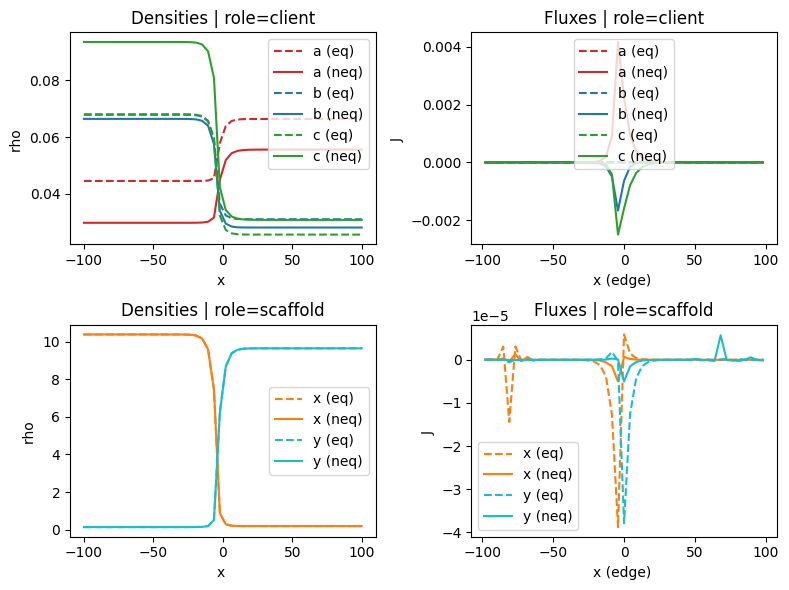

In [2]:
params = dict(
    D=1.0, beta=1.0, L=100,
    
    eps_x = -0.01, eps_y = -0.01, eps_xy = 0.2,
    eps_ax = 0.001, eps_bx = -0.02, eps_cx = -0.02,
    eps_ay = -0.02, eps_by = 0.02, eps_cy = 0.03,
    
    kappa_x= 0.5 , kappa_y = 0.5,
    
    mu_xy_II = 0.0,
    mu_ac = 0,
    
    k0_client=1, k0_scaffold=0,
    
    alpha_ab=0.2, gamma_ab=1.0,
    alpha_ac=0.8, gamma_ac=1.0,
    alpha_bc=0.5, gamma_bc=1.0,
    
    alpha_xy_I= 5, beta_xy_I=0.5, gamma_xy_I = 1.1,
    alpha_xy_II= 0, beta_xy_II=0.5, gamma_xy_II = 1.1,

    N_a = 10.0, N_b = 10.0, N_c = 10.0,
    N_x = 1000.0, N_y = 1000.0,
)

spec = spec_test(params)

rho_0, x = rd.initial_guess(params, spec)

        
rho_ss, info = rd.solve_steady_state(x, rho_0, spec, beta=params["beta"], max_iter=10000, tol=1e-6, verbose=True, interval=100)
print(info)

params['mu_ac'] = 1
params['mu_xy_I'] = 0
spec_neq = spec_test(params)
rho_neq, info = rd.solve_steady_state(x, rho_ss, spec_neq, beta=params["beta"], max_iter=10000, tol=1e-6, verbose=True, interval=100)
print(info)

plotting.plot_eq_neq(x=x, rho_eq=rho_ss, rho_neq=rho_neq, spec=spec, show=True, roles=('client','scaffold'))



In [7]:
# # run a simulation for different kappa_x values
kappa_list_1 = np.logspace(-2, 1, 21)  # From 0.1 to 10
kappa_list_2 = [0.01, 0.1, 0.5, 1, 5]

filename_1 = "saved_sim/kappa_x_experiment_results_1.pkl"
filename_2 = "saved_sim/kappa_x_experiment_results_2.pkl"

# for kappa_list, filename in [(kappa_list_1, filename_1), (kappa_list_2, filename_2)]:
#     kappa_x_values = kappa_list

#     results = {}
#     params_kappa = params.copy()
#     for kappa_x in kappa_x_values:
#         print(f"[ kappa_x = {kappa_x} ]")
#         params_kappa['kappa_x'] = kappa_x
#         params_kappa['kappa_y'] = kappa_x  # keep them equal for simplicity
#         params_kappa['dx_coeff'] = 5
#         spec = spec_test(params_kappa)
#         rho_0, x = rd.initial_guess(params_kappa, spec)

#         rho_ss, info = rd.solve_steady_state(x, rho_0, spec, beta=params_kappa["beta"], max_iter=10000, tol=1e-6, verbose=False)
#         res = plotting.extract_results(x, rho_ss, spec, params_kappa['beta'])
#         results[kappa_x] = res

#     with open(filename, 'wb') as f:
#         pickle.dump(results, f)

Loaded 5 results from flux experiment.
Loaded 21 results from flux experiment.
Fit parameters for A: a = -1.27, b = -1.62


C:\Users\marco\AppData\Local\Temp\ipykernel_26432\1320016284.py:207: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


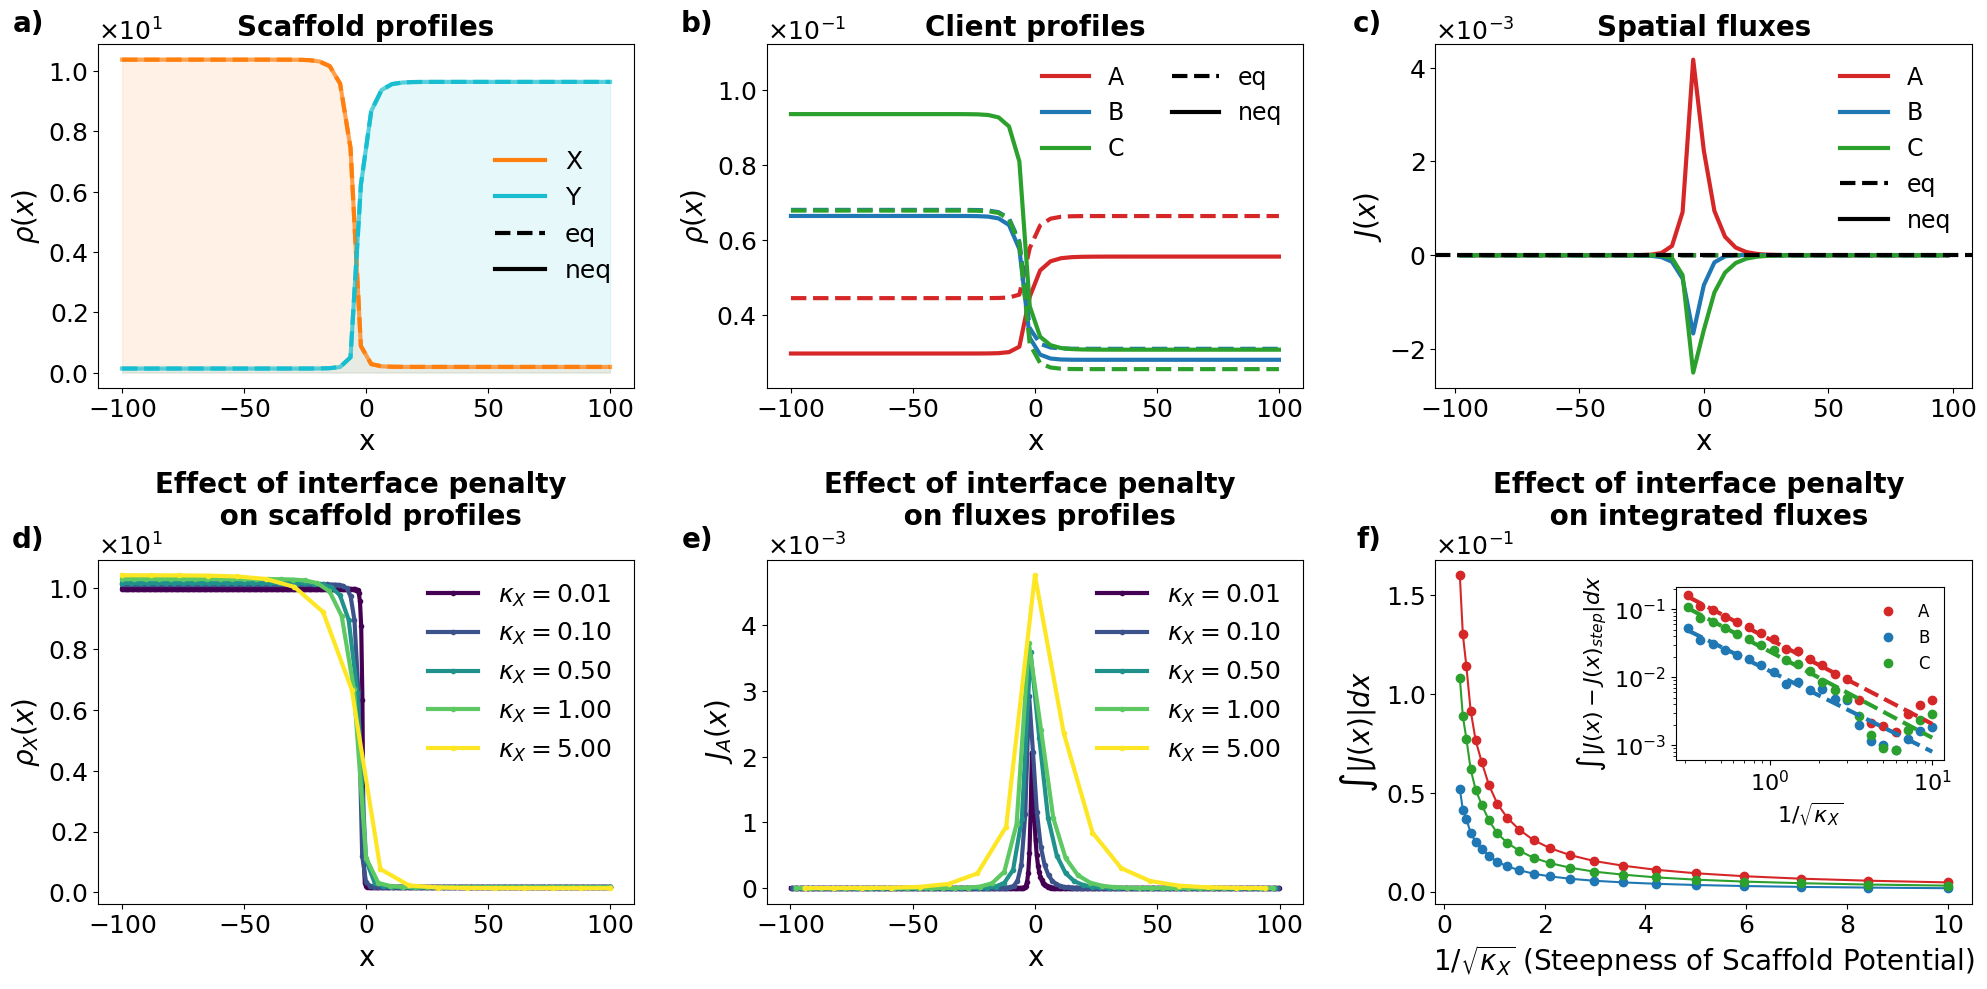

In [8]:
# plot results
from matplotlib.lines import Line2D
from matplotlib.ticker import ScalarFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


def plot_figure_complete(parameters,filename1, filename2, labelsize=14, linewidth=2):
    
    fig, ax = plt.subplots(2, 3, figsize=(20, 10))
    params = parameters.copy()
    #eq and neq 
    params['kappa_x'] = 0.5
    params['kappa_y'] = 0.5
    params['mu_ac'] = 0
    spec = spec_test(params)
    rho_0, x = rd.initial_guess(params, spec)
    rho_ss, info = rd.solve_steady_state(x, rho_0, spec, beta=params["beta"], max_iter=10000, tol=1e-6, verbose=False)
    res_ss = plotting.extract_results(x, rho_ss, spec, params['beta'])
    fluxes = res_ss['fluxes']
    
    params['mu_ac'] = 1.0
    spec_neq = spec_test(params)
    rho_neq, info = rd.solve_steady_state(x, rho_ss, spec_neq, beta=params["beta"], max_iter=10000, tol=1e-6, verbose=False)
    res_neq = plotting.extract_results(x, rho_neq, spec_neq, params['beta'])
    fluxes_neq = res_neq['fluxes']
    
    labels = ['A', 'B', 'C', 'X', 'Y']
    colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:cyan']
    # top left: density of scaffold ; top center: density of clients
    for i in range(len(spec.species)):
        if spec.species[i].role == 'scaffold':
            ax[0, 0].plot(x, rho_ss[i], color=colors[i], ls='--', lw=linewidth, label=None)
            ax[0, 0].plot(x, rho_neq[i], color=colors[i], ls='-', lw=linewidth, label=None, alpha=0.7)
            # fill between for neq
            ax[0, 0].fill_between(x, 0, rho_neq[i], color=colors[i], alpha=0.1, label=None)
        if spec.species[i].role == 'client':
            ax[0, 1].plot(x, rho_ss[i], color=colors[i], ls='--', lw=linewidth, label=None)
            ax[0, 1].plot(x, rho_neq[i], color=colors[i], ls='-', lw=linewidth, label=None)
    
    
    ax[0, 0].set_xlabel('x', fontsize=labelsize)
    ax[0, 0].set_ylabel(r'$\rho(x)$' , fontsize=labelsize)
    # same thing with the legend about colors and linestyle
    species_legend = [Line2D([0], [0], color=colors[i], lw=linewidth, label=labels[i]) for i in range(3, 5)]
    eq_legend = [
        Line2D([0], [0], color='black', lw=linewidth, ls='--', label='eq'),
        Line2D([0], [0], color='black', lw=linewidth, ls='-', label='neq')
    ]
    ax[0, 0].legend(handles=species_legend + eq_legend, frameon=False, fontsize=labelsize-2)
    
    # Add custom legend: colored lines for species, black lines for eq/neq
    species_legend = [Line2D([0], [0], color=colors[i], lw=linewidth, label=labels[i]) for i in range(3)]
    eq_legend = [
        Line2D([0], [0], color='black', lw=linewidth, ls='--', label='eq'),
        Line2D([0], [0], color='black', lw=linewidth, ls='-', label='neq')
    ]
    #set an slightly higher ylimit
    y_max = max(np.max(rho_ss[:3]), np.max(rho_neq[:3]))
    y_min = min(np.min(rho_ss[:3]), np.min(rho_neq[:3]))
    ax[0, 1].set_ylim(y_min * 0.8, y_max*1.2)
    ax[0, 1].legend(handles=species_legend + eq_legend, frameon=False, fontsize=labelsize-3, ncol=2)
    
    #scientific notation for y axis with 2 decimal places
    ax[0, 1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax[0, 1].set_xlabel('x', fontsize=labelsize)
    ax[0, 1].set_ylabel(r'$\rho(x)$', fontsize=labelsize)
    
    # top right: fluxes of clients a, b, c
    for i, s in enumerate(spec.species):
        if s.role == 'client':
            x_flux, flux = fluxes[s.name]
            x_flux_neq, flux_neq = fluxes_neq[s.name]
            ax[0, 2].plot(x_flux, flux, color=colors[i], ls='--', lw=linewidth, label=None)
            ax[0, 2].plot(x_flux_neq, flux_neq, color=colors[i], lw=linewidth, label=None)
    
    ax[0, 2].set_xlabel('x', fontsize=labelsize)
    ax[0, 2].set_ylabel(r'$J(x)$', fontsize=labelsize)
    ax[0, 2].axhline(0, color='black', linestyle='--', lw=linewidth)
    # same legend as before
    species_legend = [Line2D([0], [0], color=colors[i], lw=linewidth, label=labels[i]) for i in range(3)]
    eq_legend = [
        Line2D([0], [0], color='black', lw=linewidth, ls='--', label='eq'),
        Line2D([0], [0], color='black', lw=linewidth, ls='-', label='neq')
    ]
    ax[0, 2].legend(handles=species_legend + eq_legend, frameon=False, fontsize=labelsize-3)
    ax[0, 2].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    

    
    # bottom left: scaffold at different kappa
    # load results
    with open(filename2, 'rb') as f:
        results = pickle.load(f)
    print(f"Loaded {len(results)} results from flux experiment.")
    kappa_list = sorted(results.keys())
    colors_viridis = plt.cm.viridis(np.linspace(0, 1, len(kappa_list)))
    
    for i, kappa in enumerate(kappa_list):
        densities, fluxes = results[kappa]['densities'], results[kappa]['fluxes']
        for s in spec.species:
            if s.name == 'x':
                x_k, rho_ss_k = densities[s.name]
                ax[1, 0].plot(x_k, rho_ss_k, label=r'$\kappa_X={:.2f}$'.format(kappa), marker='.', color=colors_viridis[i], lw=linewidth)
            if s.name == 'a':
                x_k_flux, fluxes_k = fluxes[s.name]
                ax[1, 1].plot(x_k_flux, fluxes_k, label=r'$\kappa_X={:.2f}$'.format(kappa), marker='.', color=colors_viridis[i], lw=linewidth)
        
    ax[1, 0].set_xlabel('x', fontsize=labelsize)
    ax[1, 0].set_ylabel(r'$\rho_X(x)$', fontsize=labelsize)
    ax[1, 0].legend(frameon=False, fontsize=labelsize-2)
    ax[1, 1].set_xlabel('x', fontsize=labelsize)
    
    ax[1, 1].set_ylabel(r'$J_A(x)$', fontsize=labelsize)
    ax[1, 1].legend(frameon=False, fontsize=labelsize-2)
    ax[1, 1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    
    
    # # bottom right: integral of absolute flux of a at different kappa with inset
    with open(filename1, 'rb') as f:
        results = pickle.load(f)
    print(f"Loaded {len(results)} results from flux experiment.")
    kappa_list = sorted(results.keys())
    
    integral_to_fit = {}
    integrals = {}
    kappa_values = []
    params_step = parameters.copy()
    params_step['kappa_x'] = 0
    params_step['kappa_y'] = 0
    spec_step = spec_test(params_step)
    rho_0_step, x_step = rd.initial_guess(params_step, spec_step)
    rho_ss_step, info = rd.solve_steady_state(x_step, rho_0_step, spec_step, beta=params_step["beta"], max_iter=10000, tol=1e-6, verbose=False)
    res_step = plotting.extract_results(x_step, rho_ss_step, spec_step, params_step['beta'])
    
    for s in spec.species:
        integral_to_fit[s.name] = []
        integrals[s.name] = []
        for kappa, res in results.items():
            x_flux_k, fluxes_k = res['fluxes'][s.name]
            fluxes_step_interp = np.interp(x_flux_k, res_step['fluxes'][s.name][0], res_step['fluxes'][s.name][1])
            integral_to_fit[s.name].append(rd.compute_mass(np.abs(fluxes_k - fluxes_step_interp), x_flux_k))
            integrals[s.name].append(rd.compute_mass(np.abs(fluxes_k), x_flux_k))
    kappa_values = sorted(results.keys())
        
    
    steepness_values = 1/np.sqrt(kappa_values)
    
    for i,s in enumerate(spec.species):
        if s.role == 'client':
            ax[1, 2].plot(steepness_values, integrals[s.name], label=f'Integral |Flux {s.name.upper()} - Flux {s.name.upper()} step|', marker='o', color=colors[i])

    
    ax[1, 2].set_xlabel(r'$1/\sqrt{\kappa_X}$ (Steepness of Scaffold Potential)', fontsize=labelsize)
    ax[1, 2].set_ylabel(r'$\int |J(x)| dx$', fontsize=labelsize)
    ax[1, 2].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    # create an inset
     
    axin = inset_axes(ax[1, 2], width="50%", height="50%", loc='upper right', borderpad=2)
    for i,s in enumerate(spec.species):
        if s.role == 'client':
            axin.plot(steepness_values, integral_to_fit[s.name], label=f'{s.name.upper()}', marker='o', lw=linewidth, ls =' ', color=colors[i])
            
    axin.set_xlabel(r'$1/\sqrt{\kappa_X}$', fontsize=labelsize-4)
    axin.set_ylabel(r'$\int |J(x)-J(x)_{step}| dx$', fontsize=labelsize-4)
    axin.tick_params(axis='both', which='major', labelsize=labelsize-4)
    axin.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    axin.legend(fontsize=labelsize-8, frameon=False, ncol = 1)
    # fit data to y = (steepness)^a 10^b
    def power_law(x, a, b):
        return  (x**a) * (10**b)
    from scipy.optimize import curve_fit
    for i, s in enumerate(spec.species):
        if s.role == 'client':
            popt_a, pcov_a = curve_fit(power_law, steepness_values, integral_to_fit[s.name], maxfev=10000)
            x_fit = np.linspace(min(steepness_values), max(steepness_values), 100)
            axin.plot(x_fit, power_law(x_fit, *popt_a),  ls='--', lw=linewidth, color=colors[i])
    print(f"Fit parameters for A: a = {popt_a[0]:.2f}, b = {popt_a[1]:.2f}")
    axin.set_xscale('log')
    axin.set_yscale('log')
    
    # set the ticks of the main subplots in major formatter
    for i in range(2):
        for j in range(3):
            ax[i, j].tick_params(axis='both', which='major', labelsize=labelsize-2)
            ax[i, j].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
            ax[i, j].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
            # scientific notation offset text size
            ax[i, j].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
            ax[i, j].xaxis.get_offset_text().set_fontsize(labelsize-2)
            ax[i, j].yaxis.get_offset_text().set_fontsize(labelsize-2)
            
    # titles 
    titles = ['Scaffold profiles', 'Client profiles', 'Spatial fluxes',
              'Effect of interface penalty \n on scaffold profiles',
              'Effect of interface penalty \n on fluxes profiles',
              'Effect of interface penalty \n on integrated fluxes',
              ]
    for ii in range(2):
        for jj in range(3):
            ax[ii, jj].set_title(titles[ii*3 + jj], fontsize=labelsize, fontweight='bold')
    #add subplot labels (a), (b), ...
    subplot_labels = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)']
    for ii in range(2):
        for jj in range(3):
            ax[ii, jj].text(-0.1, 1.1, subplot_labels[ii*3 + jj], transform=ax[ii, jj].transAxes,
                            fontsize=labelsize, fontweight='bold', va='top', ha='right')
    plt.tight_layout()
    plt.savefig('figures/figure_complete.png', dpi=300)
    plt.show()
    return


plot_figure_complete(params, filename_1, filename_2, labelsize=20, linewidth=3)

# No flux conditions

In [215]:
from examples_specs import spec_complete

def no_flux_experiment(params, filename, verbose=True):
    
    results = {}   
    params_no_activity = params.copy()
    params_no_cycle = params.copy()
    params_same_spatial = params.copy()
    params_no_spatial = params.copy()
    
    # reference
    spec = spec_complete(params)
    rho_0, x = rd.initial_guess(params, spec)
    
    rho_neq, info = rd.solve_steady_state(x, rho_0, spec, beta=params["beta"], max_iter=10000, tol=1e-6, verbose=verbose, interval=100)
    results['Reference'] = plotting.extract_results(x, rho_neq, spec, params['beta'])
    print(f"[ Reference solution computed. ] \t[info: {info}]")
    
    # no activity
    params_no_activity['mu_ac'] = 0
    spec_no_activity = spec_complete(params_no_activity)
    rho_no_activity, info = rd.solve_steady_state(x, rho_0, spec_no_activity, beta=params_no_activity["beta"], max_iter=10000, tol=1e-6, verbose=verbose, interval=100)
    results['No Activity'] = plotting.extract_results(x, rho_no_activity, spec_no_activity, params_no_activity['beta'])
    print(f'[ No activity solution computed. ] \t[info: {info}]')
    
    # no cycle
    params_no_cycle['k0_bc'] = 0
    params_no_cycle['k0_ac'] = 0
    spec_no_cycle = spec_complete(params_no_cycle)
    rho_no_cycle, info = rd.solve_steady_state(x, rho_0, spec_no_cycle, beta=params_no_cycle["beta"], max_iter=10000, tol=1e-6, verbose=False, interval=100)
    results['No Cycle'] = plotting.extract_results(x, rho_no_cycle, spec_no_cycle, params_no_cycle['beta'])
    print(f"[ No cycle solution computed. ] \t[info: {info}]")

    # same spatial
    params_same_spatial['alpha_ac'] = 0.8
    params_same_spatial['alpha_bc'] = 0.8
    params_same_spatial['alpha_ab'] = 0.8
    params_same_spatial['gamma_ac'] = 3
    params_same_spatial['gamma_bc'] = 2
    params_same_spatial['gamma_ab'] = 1
    spec_same_spatial = spec_complete(params_same_spatial)
    rho_same_spatial, info = rd.solve_steady_state(x, rho_0, spec_same_spatial, beta=params_same_spatial["beta"], max_iter=10000, tol=1e-6, verbose=verbose, interval=100)
    results['Same Spatial \nDependence'] = plotting.extract_results(x, rho_same_spatial, spec_same_spatial, params_same_spatial['beta'])
    print(f'[ Same spatial solution computed. ] \t[info: {info}]')

    # no spatial
    params_no_spatial['alpha_ac'] = 0
    params_no_spatial['alpha_bc'] = 0
    params_no_spatial['alpha_ab'] = 0
    params_no_spatial['gamma_ac'] = 3
    params_no_spatial['gamma_bc'] = 2
    params_no_spatial['gamma_ab'] = 1
    spec_no_spatial = spec_complete(params_no_spatial)
    rho_no_spatial, info = rd.solve_steady_state(x, rho_0, spec_no_spatial, beta=params_no_spatial["beta"], max_iter=10000, tol=1e-6, verbose=verbose, interval=100)
    results['No Spatial \nDependence'] = plotting.extract_results(x, rho_no_spatial, spec_no_spatial, params_no_spatial['beta'])
    print(f'[ No spatial solution computed. ] \t[info: {info}]')

    # Save results with pickle
    with open(filename, 'wb') as f:
        pickle.dump(results, f)
    print(f"Results saved to {filename}.")
    return
    
    

In [216]:
# plot the no flux experiment
def plot_no_flux_experiment(filename, labelsize=14, linewidth=2):
    with open(filename, 'rb') as f:
        results = pickle.load(f)
    print(f"Loaded results from {filename}.")
        
    # Plotting
    fig, axs = plt.subplots(3, 5, figsize=(20, 10))
    
    # column titles
    title_padding = 12
    for i, title in enumerate(results.keys()):
        axs[0, i].set_title(title, fontsize=labelsize + 2, fontweight='bold', pad=title_padding)
  
    # profiles
    colors = ['tab:red', 'tab:blue', 'tab:green']
    colors_barriers = ['tab:purple', 'tab:orange', 'tab:brown']
    
    for i, key in enumerate(results.keys()):
        res = results[key]
        x = res['densities']['a'][0]
        for j, species in enumerate(['a', 'b', 'c']):
            axs[0, i].plot(x, res['densities'][species][1], label=species.upper(), color=colors[j], lw=linewidth)
            axs[1, i].plot(res['fluxes'][species][0], res['fluxes'][species][1], label=species.upper(), color=colors[j], lw=linewidth)
        for j, barr in enumerate(['a_to_b', 'b_to_c', 'a_to_c']):
            barr_label = f'$V_{{{barr.replace("_to_", "").upper()}}}$'
            axs[2, i].plot(x, res['barriers'][barr,0],  label=barr_label, color=colors_barriers[j], lw=linewidth, ls='-')

    # set same y limits for densities, same for all fluxes and same for barriers
    y_max_density = 0
    y_max_flux = 0
    y_max_barrier = 0
    for key in results.keys():
        res = results[key]
        for species in ['a', 'b', 'c']:
            y_max_density = max(y_max_density, np.max(res['densities'][species][1]))
            y_max_flux = max(y_max_flux, np.max(np.abs(res['fluxes'][species][1])))
        for barr in ['a_to_b', 'b_to_c', 'a_to_c']:
            y_max_barrier = max(y_max_barrier, np.max(res['barriers'][barr,0]))
    for i in range(5):
        axs[0, i].set_ylim(0, y_max_density * 1.4)
        axs[1, i].set_ylim(-y_max_flux * 1.01, y_max_flux * 1.11)
        axs[2, i].set_ylim(0, y_max_barrier * 1.1)
    
    #legends
    for i in range(5):
        axs[0, i].legend(frameon=False, fontsize=labelsize-2)
        axs[1, i].legend(frameon=False, fontsize=labelsize-2, loc = 'upper right')
        axs[2, i].legend(frameon=False, fontsize=labelsize-2)
    for ax in axs[2, :]:
        ax.set_ylim(0, 10)
        ax.set_xlabel('x', fontsize=labelsize)
        ax.legend(fontsize=max(8, labelsize-2), frameon=False, loc='upper left')
    
    # tidy up ticks, labels and alignment
    for ax in axs.flat:
        ax.label_outer()
        ax.tick_params(labelsize=labelsize)
    y_labels = ['ρ(x)', 'J(x)', 'V(x)']
    labelpad = 70
    for i, ylabel in enumerate(y_labels):
        axs[i, 0].set_ylabel(ylabel, fontsize=labelsize + 2, labelpad=labelpad)
        axs[i, 0].yaxis.set_label_coords(-0.25, 0.5)
    # the little power of ten in scientific notation should be slightly bigger
    for ax in axs.flat:
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        ax.yaxis.get_offset_text().set_fontsize(labelsize-5)
        # only 5 ticks on y axis
        ax.yaxis.set_major_locator(plt.MaxNLocator(3))
    # align all titles
    plt.tight_layout()
    plt.savefig('figures/no_flux_experiment.png', bbox_inches='tight')
    plt.show()

[ Reference solution computed. ] 	[info: {'converged': True, 'message': 'Converged by rolling mean of last 10 diffs.', 'final_diff': 9.718724537192084e-07, 'iter': 84, 'final_masses': [('a', 8.575415525461018), ('b', 9.26052185067502), ('c', 12.16406262386397), ('x', 1000.0000000000005), ('y', 1000.0)]}]
[ No activity solution computed. ] 	[info: {'converged': True, 'message': 'Converged by rolling mean of last 10 diffs.', 'final_diff': 9.491715747981976e-07, 'iter': 92, 'final_masses': [('a', 11.133710767466678), ('b', 9.722591466606259), ('c', 9.143697765927078), ('x', 1000.0000000000002), ('y', 1000.0)]}]
[ No cycle solution computed. ] 	[info: {'converged': True, 'message': 'Converged by rolling mean of last 10 diffs.', 'final_diff': 9.194032526405979e-07, 'iter': 94, 'final_masses': [('a', 10.676595725785548), ('b', 9.32340427421445), ('c', 10.000000000000005), ('x', 1000.0), ('y', 1000.0000000000002)]}]
[ Same spatial solution computed. ] 	[info: {'converged': True, 'message': 'C

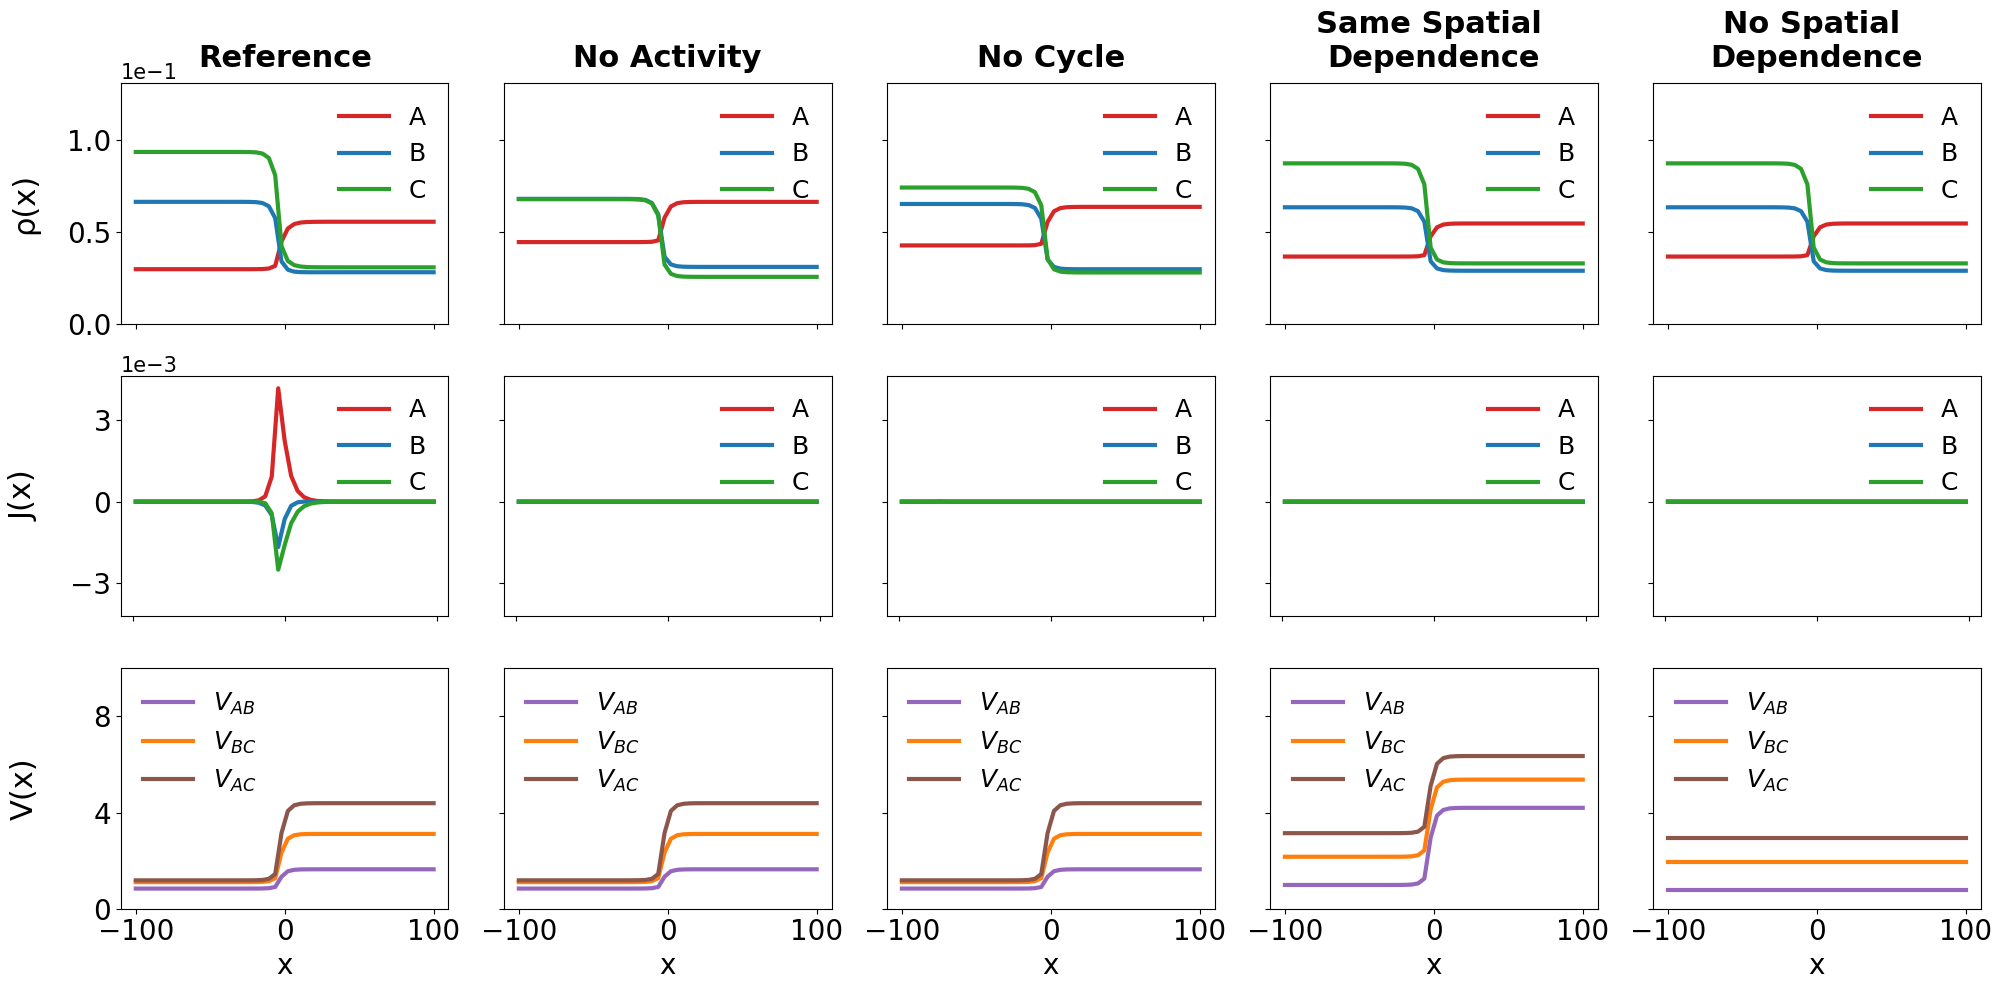

In [217]:
params = dict(
    D=1.0, beta=1.0, L=100,
    
    eps_x = -0.01, eps_y = -0.01, eps_xy = 0.2,
    eps_ax = 0.001, eps_bx = -0.02, eps_cx = -0.02,
    eps_ay = -0.02, eps_by = 0.02, eps_cy = 0.03,
    
    kappa_x= 0.5 , kappa_y = 0.5,
    
    mu_xy_II = 0.0,
    mu_ac = 1,
    
    k0_ab =1, k0_ac=1, k0_bc=1,
    k0_scaffold=0,
    
    alpha_ab=0.2, gamma_ab=1.0,
    alpha_ac=0.8, gamma_ac=1.0,
    alpha_bc=0.5, gamma_bc=1.0,
    
    alpha_xy_I= 5, beta_xy_I=0.5, gamma_xy_I = 1.1,
    alpha_xy_II= 0, beta_xy_II=0.5, gamma_xy_II = 1.1,

    N_a = 10.0, N_b = 10.0, N_c = 10.0,
    N_x = 1000.0, N_y = 1000.0,
)
filename_no_flux = "saved_sim/no_flux_experiment_results.pkl"
no_flux_experiment(params, filename_no_flux, verbose=False)
plot_no_flux_experiment(filename_no_flux, labelsize=20, linewidth=3)


# Barrier experiments

In [75]:
def experiment_barriers(params, alpha_list, filename, verbose=True):
    results = {}
    params_barriers = params.copy()
    for alpha_ac in alpha_list:
        for alpha_ab in alpha_list:
            params_barriers['alpha_ac'] = alpha_ac
            params_barriers['alpha_ab'] = alpha_ab
            params_barriers['alpha_bc'] = alpha_ab
            print(f"[ alpha_ac = {alpha_ac:.2f} ] [ alpha_bc = {alpha_ab:.2f} ] [alpha_ab = {alpha_ab:.2f} ]")
            spec = spec_complete(params_barriers)
            rho_0, x = rd.initial_guess(params_barriers, spec)

            rho_ss, info = rd.solve_steady_state(x, rho_0, spec, beta=params_barriers["beta"], max_iter=10000, tol=1e-6, verbose=verbose, interval=100)
            res = plotting.extract_results(x, rho_ss, spec, params_barriers['beta'])
            results[(alpha_ac, alpha_ab)] = res
    with open(filename, 'wb') as f:
        pickle.dump(results, f)
        

In [135]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_barrier_experiment(filename, fixed_index, amount_to_plot, labelsize=14, linewidth=2):
    with open(filename, 'rb') as f:
        results = pickle.load(f)
    print(f"Loaded results from {filename}.")
    
    # on the left a heatmap of the integral of the absolute flux of client A as a function of alpha_ac and alpha_ab
    alpha_ac_values = sorted(set([key[0] for key in results.keys()]))
    alpha_ab_values = sorted(set([key[1] for key in results.keys()]))
    
    integral_matrix = np.zeros((len(alpha_ac_values), len(alpha_ab_values)))
    for i, alpha_ac in enumerate(alpha_ac_values):
        for j, alpha_ab in enumerate(alpha_ab_values):
            res = results[(alpha_ac, alpha_ab)]
            x_flux, flux_a = res['fluxes']['a']
            integral_matrix[i, j] = rd.compute_mass(np.abs(flux_a), x_flux)
            
    fig, ax = plt.subplots(1, 3, figsize=(20, 6))
    x = np.linspace(min(alpha_ab_values), max(alpha_ab_values), integral_matrix.shape[1])
    y = np.linspace(min(alpha_ac_values), max(alpha_ac_values), integral_matrix.shape[0])
    X, Y = np.meshgrid(x, y)
    contour =ax[0].contourf(X, Y, integral_matrix.T, levels=100, cmap='viridis')
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes("right", size="5%", pad=0.5)
    cbar = fig.colorbar(contour, cax=cax)
    cax.yaxis.set_label_position('left')
    #cax.set_ylabel(rf'$\int |J_{label}(x)| \, dx$', rotation=90, ha='right', fontsize=labelsize)
    cbar.formatter = ScalarFormatter(useMathText=True)
    cbar.formatter.set_powerlimits((-2, 2))
    cbar.update_ticks()
    ax[0].plot(alpha_ac_values, alpha_ab_values, color='red', ls='--', lw=linewidth, label=r'$\alpha_{AB}=\alpha_{BC}=\alpha_{AC}$')
    ax[0].legend(frameon=True, fontsize=labelsize-2)
    ax[0].set_ylabel(r'$\alpha_{AB}$', fontsize=labelsize)
    ax[0].set_xlabel(r'$\alpha_{AC}$', fontsize=labelsize)
    ax[0].tick_params(labelsize=labelsize-2)
    
    # center and right are the profiles annd the fluxes for a fixed alpha_ab = 0.2 and varying alpha_ac (only a few curves to avoid clutter)
    
    alpha_ab_fixed = sorted(set([key[1] for key in results.keys()]))[fixed_index]
    alpha_ac_values_to_plot = sorted(set([key[0] for key in results.keys()]))[:: max(1, len(alpha_ac_values)//amount_to_plot)]
    colors_viridis = plt.cm.viridis(np.linspace(0, 1, len(alpha_ac_values_to_plot)))
    for i, alpha_ac in enumerate(alpha_ac_values_to_plot):
        res = results[(alpha_ac, alpha_ab_fixed)]
        x = res['densities']['a'][0]
        rho_a = res['densities']['a'][1]
        x_flux = res['fluxes']['a'][0]
        flux_a = res['fluxes']['a'][1]
        ax[1].plot(x, rho_a, label=r'$\alpha_{{AC}}={:.1f}$'.format(alpha_ac), color=colors_viridis[i], lw=linewidth)
        ax[2].plot(x_flux, flux_a, label=r'$\alpha_{{AC}}={:.1f}$'.format(alpha_ac), color=colors_viridis[i], lw=linewidth)
    
    # plot the one for which all alpha are equal as a dashed line
    res_equal = results[(alpha_ab_fixed, alpha_ab_fixed)]
    x_equal = res_equal['densities']['a'][0]
    rho_a_equal = res_equal['densities']['a'][1]
    x_flux_equal = res_equal['fluxes']['a'][0]
    flux_a_equal = res_equal['fluxes']['a'][1]
    ax[1].plot(x_equal, rho_a_equal, color='red', lw=linewidth, ls='--')
    ax[2].plot(x_flux_equal, flux_a_equal, color='red', lw=linewidth, ls='--')
    
    ax[1].set_xlabel('x', fontsize=labelsize)
    ax[1].set_ylabel(r'$\rho_A(x)$', fontsize=labelsize)
    #ax[1].legend(frameon=False, fontsize=labelsize-2)
    #in the legend only few values
    handles, labels = ax[1].get_legend_handles_labels()
    step = max(1, len(handles)//5)
    ax[1].legend(handles[::step], labels[::step], frameon=False, fontsize=labelsize-2)
    #ax[2].legend(handles[::step], labels[::step], frameon=False, fontsize=labelsize-2)
    #ax[2].set_ylim()
    # add subplot labels (a), (b), (c)
    subplot_labels = ['a)', 'b)', 'c)']
    for i in range(3):
        ax[i].text(-0.1, 1.1, subplot_labels[i], transform=ax[i].transAxes,
                   fontsize=labelsize, fontweight='bold', va='top', ha='right')
    # major tick formatter
    for i in range(3):
        ax[i].tick_params(axis='both', which='major', labelsize=labelsize-2)
        ax[i].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        ax[i].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        # scientific notation offset text size
        ax[i].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        ax[i].xaxis.get_offset_text().set_fontsize(labelsize-2)
        ax[i].yaxis.get_offset_text().set_fontsize(labelsize-3)
    # increase cbar fontsize
    cbar.ax.yaxis.label.set_size(labelsize)
    cbar.ax.yaxis.offsetText.set_fontsize(labelsize-3)
    cbar.ax.yaxis.get_offset_text().set_fontsize(labelsize-3)
    # ticks size of cbar
    cbar.ax.tick_params(labelsize=labelsize-2)
    # only 5 ticks on cbar
    cbar.locator = plt.MaxNLocator(nbins=5)
    cbar.update_ticks()
    #only 5 ticks on y axis
    for i in range(3):
        ax[i].yaxis.set_major_locator(plt.MaxNLocator(5))
        
    # set titles
    titles = [f'Integral of Client Flux:\n '+r'$I_A=\int |J_A(x)| dx$',
              f'Concentration profiles \n at different barrier parameters',
              f'Flux profiles \n at different barrier parameters']
    for i in range(3):
        ax[i].set_title(titles[i], fontsize=labelsize, fontweight='bold')
    plt.tight_layout()
    plt.savefig('figures/barrier_experiment.png', bbox_inches='tight')
    plt.show()
    
    

Loaded results from saved_sim/barrier_experiment_results.pkl.


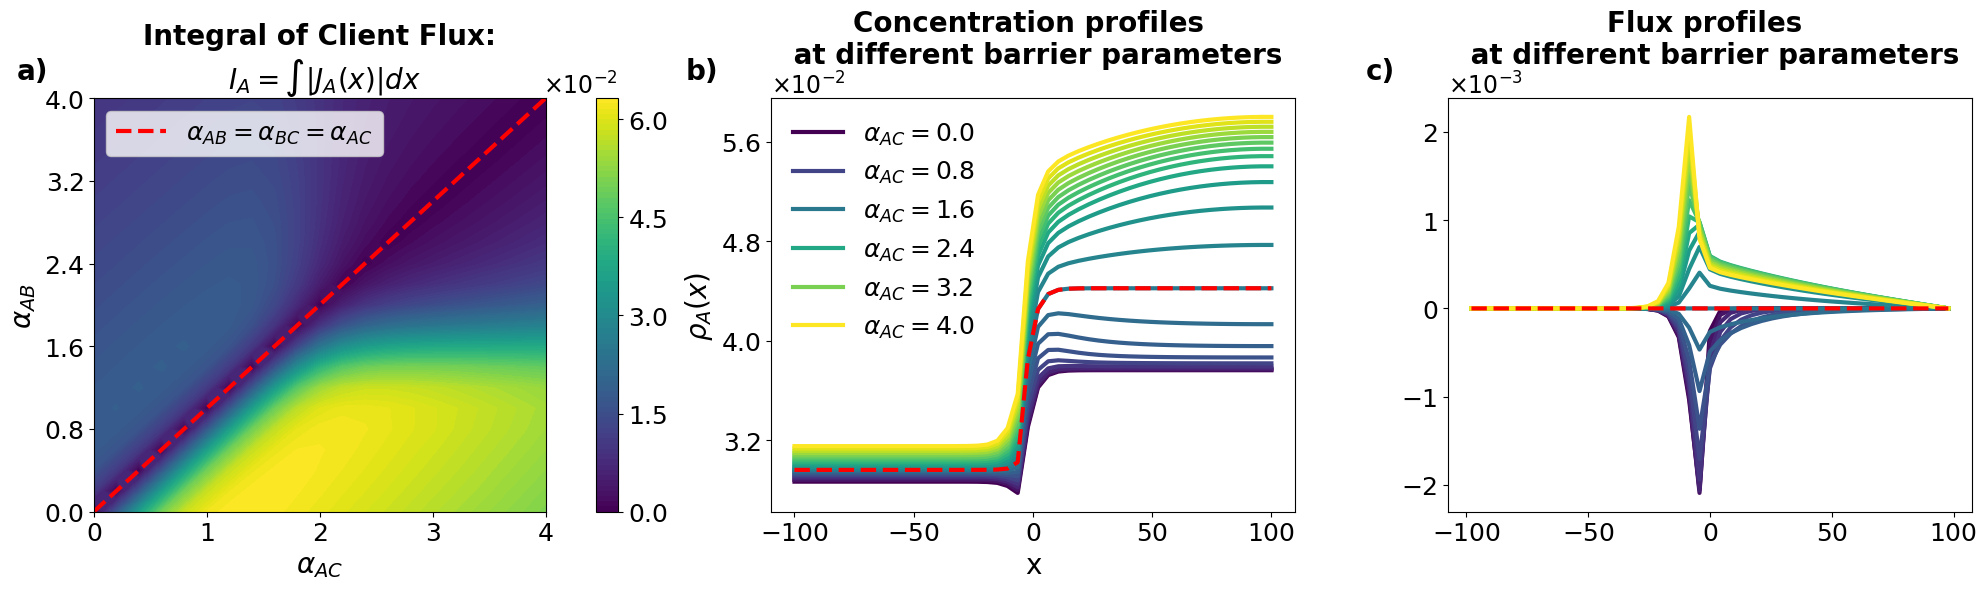

1.6


In [ ]:
params = dict(
    D=1.0, beta=1.0, L=100,
    
    eps_x = -0.01, eps_y = -0.01, eps_xy = 0.2,
    eps_ax = 0.001, eps_bx = -0.02, eps_cx = -0.02,
    eps_ay = -0.02, eps_by = 0.02, eps_cy = 0.03,
    
    kappa_x= 0.5 , kappa_y = 0.5,
    
    mu_xy_II = 0.0,
    mu_ac = 1,
    
    k0_ab =1, k0_ac=1, k0_bc=1,
    k0_scaffold=0,
    
    alpha_ab=0.2, gamma_ab=1.0,
    alpha_ac=0.8, gamma_ac=1.0,
    alpha_bc=0.5, gamma_bc=1.0,
    
    alpha_xy_I= 5, beta_xy_I=0.5, gamma_xy_I = 1.1,
    alpha_xy_II= 0, beta_xy_II=0.5, gamma_xy_II = 1.1,

    N_a = 10.0, N_b = 10.0, N_c = 10.0,
    N_x = 1000.0, N_y = 1000.0,
)

alpha_list = np.linspace(0, 4, 21)
filename_barrier = "saved_sim/barrier_experiment_results.pkl"
#experiment_barriers(params, alpha_list, filename_barrier, verbose=False)4
idx = 8 
plot_barrier_experiment(filename_barrier, fixed_index=idx, amount_to_plot=20, labelsize=20, linewidth=3)
print(f'{alpha_list[idx]}')


In [187]:
idx = 4
print(f'{alpha_list[idx]}')


0.8


Loaded no-flux experiment results from saved_sim/no_flux_experiment_results.pkl.
Loaded barrier experiment results from saved_sim/barrier_experiment_results.pkl.


C:\Users\marco\AppData\Local\Temp\ipykernel_26432\3213970016.py:208: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


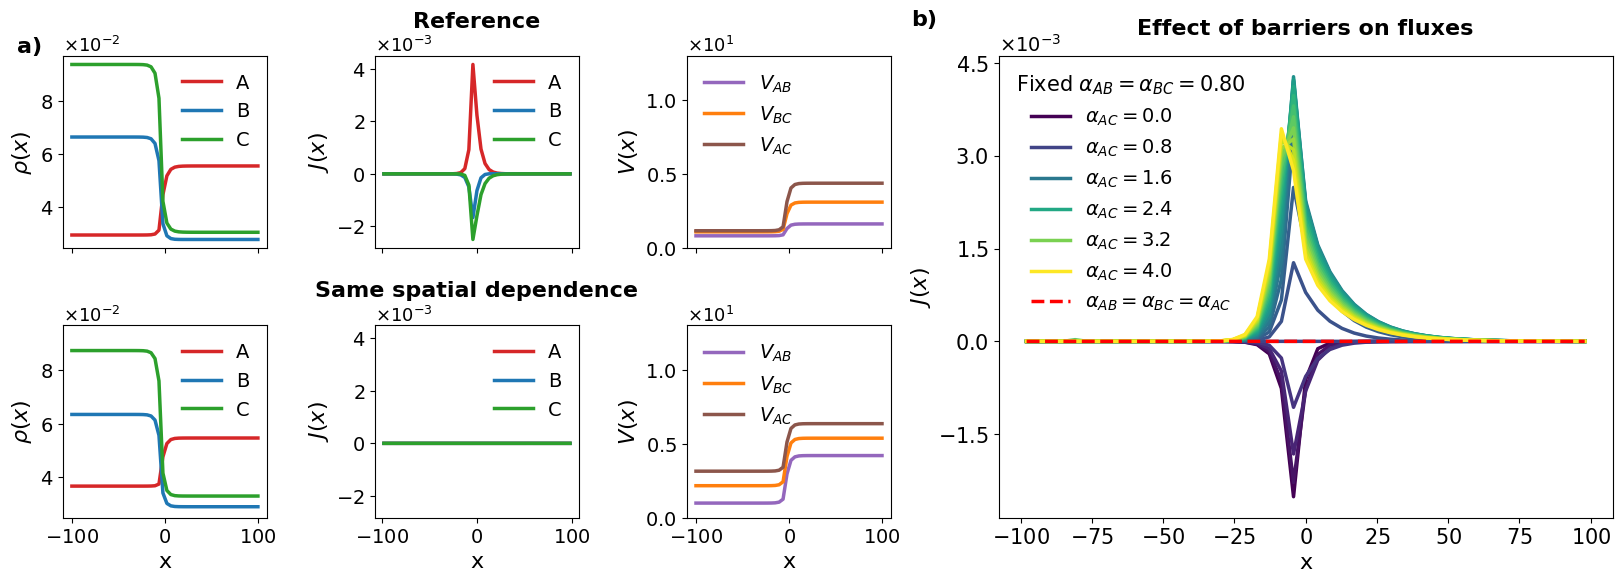

In [224]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.gridspec import GridSpec

# ---------------------------------------------------------------------
# Helpers
# ---------------------------------------------------------------------
def _fmt_axes(ax, labelsize):
    ax.tick_params(axis='both', which='major', labelsize=labelsize-2)
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax.xaxis.get_offset_text().set_fontsize(labelsize-3)
    ax.yaxis.get_offset_text().set_fontsize(labelsize-3)

# different formatter for axsB because it is larger
def _fmt_axes_B(ax, labelsize):
    ax.tick_params(axis='both', which='major', labelsize=labelsize-1)
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax.xaxis.get_offset_text().set_fontsize(labelsize-2)
    ax.yaxis.get_offset_text().set_fontsize(labelsize-2)

def _plot_profiles_fluxes_barriers(res, axs_row, labelsize=14, linewidth=2,
                                   species=('a','b','c'),
                                   barrier_keys=('a_to_b','b_to_c','a_to_c'),
                                   colors=('tab:red','tab:blue','tab:green'),
                                   barrier_colors=('tab:purple','tab:orange','tab:brown'),
                                   add_legends=True):
    """Plot one row: densities | fluxes | barriers."""
    ax_rho, ax_J, ax_V = axs_row

    # densities & fluxes
    for sp, c in zip(species, colors):
        x_rho, rho = res['densities'][sp]
        x_J,   J   = res['fluxes'][sp]
        ax_rho.plot(x_rho, rho, lw=linewidth, color=c, label=sp.upper())
        ax_J.plot(x_J, J, lw=linewidth, color=c, label=sp.upper())

    # barriers
    x_b = res['densities'][species[0]][0]  # assume same x-grid
    for bk, bc in zip(barrier_keys, barrier_colors):
        V = res['barriers'][(bk, 0)] if (bk,0) in res['barriers'] else res['barriers'][bk]
        ax_V.plot(x_b, V, lw=linewidth, color=bc, label=f'$V_{{{bk.replace("_to_","").upper()}}}$')

    # labels
    ax_rho.set_ylabel(r'$\rho(x)$', fontsize=labelsize)
    ax_J.set_ylabel(r'$J(x)$', fontsize=labelsize)
    ax_V.set_ylabel(r'$V(x)$', fontsize=labelsize)
    for ax in (ax_rho, ax_J, ax_V):
        ax.set_xlabel('x', fontsize=labelsize)
        _fmt_axes(ax, labelsize)

    # legends (compact)
    if add_legends:
        ax_rho.legend(frameon=False, fontsize=labelsize-2, ncol=1)
        ax_J.legend(frameon=False, fontsize=labelsize-2, ncol=1)
        ax_V.legend(frameon=False, fontsize=labelsize-2, ncol=1, loc ='upper left')


# ---------------------------------------------------------------------
# Main: Three-panel figure
# Panel A (left): two stacked rows (reference, same spatial dependence), each with 3 subplots (ρ, J, V).
# Panel B (right): fluxes vs x at several alpha choices from the barrier experiment.
# ---------------------------------------------------------------------
def plot_three_panel_figure(
    no_flux_experiment_file,
    barriers_experiment_file,
    fixed_alpha_index=0,
    curves_to_show=7,
    labelsize=14,
    linewidth=2,
):

    # ---- load data
    with open(no_flux_experiment_file, 'rb') as f:
        no_flux_results = pickle.load(f)
    print(f"Loaded no-flux experiment results from {no_flux_experiment_file}.")
    ref = no_flux_results['Reference']
    same = no_flux_results['Same Spatial \nDependence']
    with open(barriers_experiment_file, 'rb') as f:
        barr = pickle.load(f)
    print(f"Loaded barrier experiment results from {barriers_experiment_file}.")

    # ---- prepare Panel B sampling
    alpha_ac_vals = sorted({k[0] for k in barr.keys()})
    alpha_ab_vals = sorted({k[1] for k in barr.keys()})
    alpha_ab_fixed = alpha_ab_vals[fixed_alpha_index]
    # subsample alpha_ac for readability
    step = max(1, len(alpha_ac_vals) // curves_to_show)
    alpha_ac_pick = alpha_ac_vals[::step] if len(alpha_ac_vals) > 0 else []

    # ---- layout: 2 rows x 4 cols — left 3 cols = Panel A (2 rows x 3), right col spans rows = Panel B
    fig = plt.figure(figsize=(20, 6))
    gs = GridSpec(2, 4, figure=fig, width_ratios=[1.0, 1.0, 1.0, 3], wspace=0.35, hspace=0.4)

    # Panel A, Row 1 (reference): ρ | J | V
    axA1_rho = fig.add_subplot(gs[0, 0])
    axA1_J   = fig.add_subplot(gs[0, 1])
    axA1_V   = fig.add_subplot(gs[0, 2])

    # Panel A, Row 2 (same spatial): ρ | J | V
    axA2_rho = fig.add_subplot(gs[1, 0])
    axA2_J   = fig.add_subplot(gs[1, 1])
    axA2_V   = fig.add_subplot(gs[1, 2])

    # Panel B (right column, spans both rows): fluxes for many alpha_ac at fixed alpha_ab
    axB = fig.add_subplot(gs[:, 3])

    # ---- Panel A content
    _plot_profiles_fluxes_barriers(ref, (axA1_rho, axA1_J, axA1_V), labelsize, linewidth, add_legends=True)
    _plot_profiles_fluxes_barriers(same, (axA2_rho, axA2_J, axA2_V), labelsize, linewidth, add_legends=True)
    #set same y-limits for Panel A columns
    for ax_rho in (axA1_rho, axA2_rho):
        ylims = [np.inf, -np.inf]
        for ax in (axA1_rho, axA2_rho):
            ylim = ax.get_ylim()
            ylims[0] = min(ylims[0], ylim[0])
            ylims[1] = max(ylims[1], ylim[1])
        ax_rho.set_ylim(ylims)
    for ax_J in (axA1_J, axA2_J):
        ylims = [np.inf, -np.inf]
        for ax in (axA1_J, axA2_J):
            ylim = ax.get_ylim()
            ylims[0] = min(ylims[0], ylim[0])
            ylims[1] = max(ylims[1], ylim[1])
        ax_J.set_ylim(ylims)
    for ax_V in (axA1_V, axA2_V):
        ylims = [np.inf, -np.inf]
        for ax in (axA1_V, axA2_V):
            ylim = ax.get_ylim()
            ylims[0] = min(ylims[0], ylim[0])
            ylims[1] = max(ylims[1], ylim[1])
        ax_V.set_ylim(0, 13)
        
    #remove x axis labels from top row of Panel A
    for ax in (axA1_rho, axA1_J, axA1_V):
        ax.set_xlabel('')
        ax.set_xticklabels([])
    # Titles + tags for Panel A
    # axA1_rho.set_title('Reference: concentrations', fontsize=labelsize, fontweight='bold')
    axA1_J.set_title('Reference', fontsize=labelsize, fontweight='bold')
    # axA1_V.set_title('Reference: barriers', fontsize=labelsize, fontweight='bold')

    # axA2_rho.set_title('Same spatial dependence: concentrations', fontsize=labelsize, fontweight='bold')
    axA2_J.set_title('Same spatial dependence', fontsize=labelsize, fontweight='bold')
    # axA2_V.set_title('Same spatial dependence: barriers', fontsize=labelsize, fontweight='bold')
    

    # ---- Panel B content: fluxes for varying alpha_ac at fixed alpha_ab
    cmap = plt.cm.viridis(np.linspace(0, 1, max(1, len(alpha_ac_pick))))
    species = ['a', 'b', 'c']
    sp_colors = {'a':'tab:red','b':'tab:blue','c':'tab:green'}

    # for i, aac in enumerate(alpha_ac_pick):
    #     res = barr[(aac, alpha_ab_fixed)]
    #     x_flux = res['fluxes']['a'][0]
    #     for sp in species:
    #         J = res['fluxes'][sp][1]
    #         axB.plot(x_flux, J, color=cmap[i], lw=linewidth, label=rf'$\alpha_{{AC}}={aac:.2f}$ (fixed $\alpha_{{AB}}={alpha_ab_fixed:.2f}$)')

    # Panel B cosmetics
    axB.set_title(r'Effect of barriers on fluxes', fontsize=labelsize, fontweight='bold', pad=15)
    axB.set_xlabel('x', fontsize=labelsize)
    axB.set_ylabel(r'$J(x)$', fontsize=labelsize)
    _fmt_axes(axB, labelsize)
    
    for i, alpha_ac in enumerate(alpha_ac_pick):
        res = barr[(alpha_ac, alpha_ab_fixed)]
        x = res['densities']['a'][0]
        rho_a = res['densities']['a'][1]
        x_flux = res['fluxes']['a'][0]
        flux_a = res['fluxes']['a'][1]
        #axB.plot(x, rho_a, label=r'$\alpha_{{AC}}={:.1f}$'.format(alpha_ac), color= cmap[i], lw=linewidth)
        axB.plot(x_flux, flux_a, label=r'$\alpha_{{AC}}={:.1f}$'.format(alpha_ac), color=cmap[i], lw=linewidth)
    for i, alpha_ac in enumerate(alpha_ac_pick):
        if alpha_ac == alpha_ab_fixed:
            res_equal = barr[(alpha_ac, alpha_ab_fixed)]
            x_flux_equal = res_equal['fluxes']['a'][0]
            flux_a_equal = res_equal['fluxes']['a'][1]
            axB.plot(x_flux_equal, flux_a_equal, color='red', lw=linewidth, ls='--')
    # pick only a few labels for the legend
    handles, labels = axB.get_legend_handles_labels()
    step = max(1, len(handles)//5)
    # ADD FIXED LABEL FOR THE RED LINE
    handles.append(axB.get_lines()[-1])
    labels.append(r'$\alpha_{AB}=\alpha_{BC}=\alpha_{AC}$')
    handles = handles[::step] + [handles[-1]]
    labels = labels[::step] + [labels[-1]]
    axB.legend(handles, labels, title=rf'Fixed $\alpha_{{AB}}=\alpha_{{BC}}={alpha_ab_fixed:.2f}$', frameon=False, fontsize=labelsize-2, title_fontsize=labelsize-1, ncol=1)

    # Global title
    #fig.suptitle('Three-panel summary', fontsize=labelsize+2, fontweight='bold', y=0.98)
    # major tick formatter for Panel B
    _fmt_axes_B(axB, labelsize)
    # only 5 ticks on y axis of Panel B
    axB.yaxis.set_major_locator(plt.MaxNLocator(5))
    
    # add subplot labels (A), (B)
    axA1_rho.text(-0.1, 1.1, 'a)', transform=axA1_rho.transAxes,
                   fontsize=labelsize, fontweight='bold', va='top', ha='right')
    axB.text(-0.1, 1.1, 'b)', transform=axB.transAxes,
                     fontsize=labelsize, fontweight='bold', va='top', ha='right')

    plt.tight_layout()
    plt.savefig('figures/three_panel_summary.png', bbox_inches='tight', dpi=300)
    plt.show()


# Example usage (do not run here):
plot_three_panel_figure(
    no_flux_experiment_file=filename_no_flux,
    barriers_experiment_file=filename_barrier,
    fixed_alpha_index=4,
    curves_to_show=20,
    labelsize=16,
    linewidth=2.5,
)
